# Online Selection

*Online Selection*, a method of only computing contrastive loss for selected pairs of samples.  Taken from Adam Bielski's [siamese-triplet](https://github.com/qAp/siamese-triplet) library.

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import sys
from torchvision import transforms
from fastai.core import *
from fastai.vision import *
from efficientnet_pytorch import EfficientNet
import holoviews as hv
from kgl_deepfake.data import *
from kgl_deepfake.face_detect import *
from kgl_deepfake.df_dataset import *
from kgl_deepfake.video_compress import *
from IPython import display

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
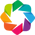

In [3]:
hv.extension('bokeh')

## Load `siamese-triplet`

### `siamese-triplet/datasets.py`

In [4]:
# %load ../../siamese-triplet/datasets.py
import numpy as np
from PIL import Image

from torch.utils.data import Dataset
from torch.utils.data.sampler import BatchSampler


class SiameseMNIST(Dataset):
    """
    Train: For each sample creates randomly a positive or a negative pair
    Test: Creates fixed pairs for testing
    """

    def __init__(self, mnist_dataset):
        self.mnist_dataset = mnist_dataset

        self.train = self.mnist_dataset.train
        self.transform = self.mnist_dataset.transform

        if self.train:
            self.train_labels = self.mnist_dataset.train_labels
            self.train_data = self.mnist_dataset.train_data
            self.labels_set = set(self.train_labels.numpy())
            self.label_to_indices = {label: np.where(self.train_labels.numpy() == label)[0]
                                     for label in self.labels_set}
        else:
            # generate fixed pairs for testing
            self.test_labels = self.mnist_dataset.test_labels
            self.test_data = self.mnist_dataset.test_data
            self.labels_set = set(self.test_labels.numpy())
            self.label_to_indices = {label: np.where(self.test_labels.numpy() == label)[0]
                                     for label in self.labels_set}

            random_state = np.random.RandomState(29)

            positive_pairs = [[i,
                               random_state.choice(self.label_to_indices[self.test_labels[i].item()]),
                               1]
                              for i in range(0, len(self.test_data), 2)]

            negative_pairs = [[i,
                               random_state.choice(self.label_to_indices[
                                                       np.random.choice(
                                                           list(self.labels_set - set([self.test_labels[i].item()]))
                                                       )
                                                   ]),
                               0]
                              for i in range(1, len(self.test_data), 2)]
            self.test_pairs = positive_pairs + negative_pairs

    def __getitem__(self, index):
        if self.train:
            target = np.random.randint(0, 2)
            img1, label1 = self.train_data[index], self.train_labels[index].item()
            if target == 1:
                siamese_index = index
                while siamese_index == index:
                    siamese_index = np.random.choice(self.label_to_indices[label1])
            else:
                siamese_label = np.random.choice(list(self.labels_set - set([label1])))
                siamese_index = np.random.choice(self.label_to_indices[siamese_label])
            img2 = self.train_data[siamese_index]
        else:
            img1 = self.test_data[self.test_pairs[index][0]]
            img2 = self.test_data[self.test_pairs[index][1]]
            target = self.test_pairs[index][2]

        img1 = Image.fromarray(img1.numpy(), mode='L')
        img2 = Image.fromarray(img2.numpy(), mode='L')
        if self.transform is not None:
            img1 = self.transform(img1)
            img2 = self.transform(img2)
        return (img1, img2), target

    def __len__(self):
        return len(self.mnist_dataset)


class TripletMNIST(Dataset):
    """
    Train: For each sample (anchor) randomly chooses a positive and negative samples
    Test: Creates fixed triplets for testing
    """

    def __init__(self, mnist_dataset):
        self.mnist_dataset = mnist_dataset
        self.train = self.mnist_dataset.train
        self.transform = self.mnist_dataset.transform

        if self.train:
            self.train_labels = self.mnist_dataset.train_labels
            self.train_data = self.mnist_dataset.train_data
            self.labels_set = set(self.train_labels.numpy())
            self.label_to_indices = {label: np.where(self.train_labels.numpy() == label)[0]
                                     for label in self.labels_set}

        else:
            self.test_labels = self.mnist_dataset.test_labels
            self.test_data = self.mnist_dataset.test_data
            # generate fixed triplets for testing
            self.labels_set = set(self.test_labels.numpy())
            self.label_to_indices = {label: np.where(self.test_labels.numpy() == label)[0]
                                     for label in self.labels_set}

            random_state = np.random.RandomState(29)

            triplets = [[i,
                         random_state.choice(self.label_to_indices[self.test_labels[i].item()]),
                         random_state.choice(self.label_to_indices[
                                                 np.random.choice(
                                                     list(self.labels_set - set([self.test_labels[i].item()]))
                                                 )
                                             ])
                         ]
                        for i in range(len(self.test_data))]
            self.test_triplets = triplets

    def __getitem__(self, index):
        if self.train:
            img1, label1 = self.train_data[index], self.train_labels[index].item()
            positive_index = index
            while positive_index == index:
                positive_index = np.random.choice(self.label_to_indices[label1])
            negative_label = np.random.choice(list(self.labels_set - set([label1])))
            negative_index = np.random.choice(self.label_to_indices[negative_label])
            img2 = self.train_data[positive_index]
            img3 = self.train_data[negative_index]
        else:
            img1 = self.test_data[self.test_triplets[index][0]]
            img2 = self.test_data[self.test_triplets[index][1]]
            img3 = self.test_data[self.test_triplets[index][2]]

        img1 = Image.fromarray(img1.numpy(), mode='L')
        img2 = Image.fromarray(img2.numpy(), mode='L')
        img3 = Image.fromarray(img3.numpy(), mode='L')
        if self.transform is not None:
            img1 = self.transform(img1)
            img2 = self.transform(img2)
            img3 = self.transform(img3)
        return (img1, img2, img3), []

    def __len__(self):
        return len(self.mnist_dataset)


class BalancedBatchSampler(BatchSampler):
    """
    BatchSampler - from a MNIST-like dataset, samples n_classes and within these classes samples n_samples.
    Returns batches of size n_classes * n_samples
    """

    def __init__(self, labels, n_classes, n_samples):
        self.labels = labels
        self.labels_set = list(set(self.labels.numpy()))
        self.label_to_indices = {label: np.where(self.labels.numpy() == label)[0]
                                 for label in self.labels_set}
        for l in self.labels_set:
            np.random.shuffle(self.label_to_indices[l])
        self.used_label_indices_count = {label: 0 for label in self.labels_set}
        self.count = 0
        self.n_classes = n_classes
        self.n_samples = n_samples
        self.n_dataset = len(self.labels)
        self.batch_size = self.n_samples * self.n_classes

    def __iter__(self):
        self.count = 0
        while self.count + self.batch_size < self.n_dataset:
            classes = np.random.choice(self.labels_set, self.n_classes, replace=False)
            indices = []
            for class_ in classes:
                indices.extend(self.label_to_indices[class_][
                               self.used_label_indices_count[class_]:self.used_label_indices_count[
                                                                         class_] + self.n_samples])
                self.used_label_indices_count[class_] += self.n_samples
                if self.used_label_indices_count[class_] + self.n_samples > len(self.label_to_indices[class_]):
                    np.random.shuffle(self.label_to_indices[class_])
                    self.used_label_indices_count[class_] = 0
            yield indices
            self.count += self.n_classes * self.n_samples

    def __len__(self):
        return self.n_dataset // self.batch_size


###  `siamese-triplet/utils.py`

In [5]:
# %load ../../siamese-triplet/utils.py
from itertools import combinations

import numpy as np
import torch


def pdist(vectors):
    distance_matrix = -2 * vectors.mm(torch.t(vectors)) + vectors.pow(2).sum(dim=1).view(1, -1) + vectors.pow(2).sum(
        dim=1).view(-1, 1)
    return distance_matrix


class PairSelector:
    """
    Implementation should return indices of positive pairs and negative pairs that will be passed to compute
    Contrastive Loss
    return positive_pairs, negative_pairs
    """

    def __init__(self):
        pass

    def get_pairs(self, embeddings, labels):
        raise NotImplementedError


class AllPositivePairSelector(PairSelector):
    """
    Discards embeddings and generates all possible pairs given labels.
    If balance is True, negative pairs are a random sample to match the number of positive samples
    """
    def __init__(self, balance=True):
        super(AllPositivePairSelector, self).__init__()
        self.balance = balance

    def get_pairs(self, embeddings, labels):
        labels = labels.cpu().data.numpy()
        all_pairs = np.array(list(combinations(range(len(labels)), 2)))
        all_pairs = torch.LongTensor(all_pairs)
        positive_pairs = all_pairs[(labels[all_pairs[:, 0]] == labels[all_pairs[:, 1]]).nonzero()]
        negative_pairs = all_pairs[(labels[all_pairs[:, 0]] != labels[all_pairs[:, 1]]).nonzero()]
        if self.balance:
            negative_pairs = negative_pairs[torch.randperm(len(negative_pairs))[:len(positive_pairs)]]

        return positive_pairs, negative_pairs


class HardNegativePairSelector(PairSelector):
    """
    Creates all possible positive pairs. For negative pairs, pairs with smallest distance are taken into consideration,
    matching the number of positive pairs.
    """

    def __init__(self, cpu=True):
        super(HardNegativePairSelector, self).__init__()
        self.cpu = cpu

    def get_pairs(self, embeddings, labels):
        if self.cpu:
            embeddings = embeddings.cpu()
        distance_matrix = pdist(embeddings)

        labels = labels.cpu().data.numpy()
        all_pairs = np.array(list(combinations(range(len(labels)), 2)))
        all_pairs = torch.LongTensor(all_pairs)
        positive_pairs = all_pairs[(labels[all_pairs[:, 0]] == labels[all_pairs[:, 1]]).nonzero()]
        negative_pairs = all_pairs[(labels[all_pairs[:, 0]] != labels[all_pairs[:, 1]]).nonzero()]

        negative_distances = distance_matrix[negative_pairs[:, 0], negative_pairs[:, 1]]
        negative_distances = negative_distances.cpu().data.numpy()
        top_negatives = np.argpartition(negative_distances, len(positive_pairs))[:len(positive_pairs)]
        top_negative_pairs = negative_pairs[torch.LongTensor(top_negatives)]

        return positive_pairs, top_negative_pairs


class TripletSelector:
    """
    Implementation should return indices of anchors, positive and negative samples
    return np array of shape [N_triplets x 3]
    """

    def __init__(self):
        pass

    def get_triplets(self, embeddings, labels):
        raise NotImplementedError


class AllTripletSelector(TripletSelector):
    """
    Returns all possible triplets
    May be impractical in most cases
    """

    def __init__(self):
        super(AllTripletSelector, self).__init__()

    def get_triplets(self, embeddings, labels):
        labels = labels.cpu().data.numpy()
        triplets = []
        for label in set(labels):
            label_mask = (labels == label)
            label_indices = np.where(label_mask)[0]
            if len(label_indices) < 2:
                continue
            negative_indices = np.where(np.logical_not(label_mask))[0]
            anchor_positives = list(combinations(label_indices, 2))  # All anchor-positive pairs

            # Add all negatives for all positive pairs
            temp_triplets = [[anchor_positive[0], anchor_positive[1], neg_ind] for anchor_positive in anchor_positives
                             for neg_ind in negative_indices]
            triplets += temp_triplets

        return torch.LongTensor(np.array(triplets))


def hardest_negative(loss_values):
    hard_negative = np.argmax(loss_values)
    return hard_negative if loss_values[hard_negative] > 0 else None


def random_hard_negative(loss_values):
    hard_negatives = np.where(loss_values > 0)[0]
    return np.random.choice(hard_negatives) if len(hard_negatives) > 0 else None


def semihard_negative(loss_values, margin):
    semihard_negatives = np.where(np.logical_and(loss_values < margin, loss_values > 0))[0]
    return np.random.choice(semihard_negatives) if len(semihard_negatives) > 0 else None


class FunctionNegativeTripletSelector(TripletSelector):
    """
    For each positive pair, takes the hardest negative sample (with the greatest triplet loss value) to create a triplet
    Margin should match the margin used in triplet loss.
    negative_selection_fn should take array of loss_values for a given anchor-positive pair and all negative samples
    and return a negative index for that pair
    """

    def __init__(self, margin, negative_selection_fn, cpu=True):
        super(FunctionNegativeTripletSelector, self).__init__()
        self.cpu = cpu
        self.margin = margin
        self.negative_selection_fn = negative_selection_fn

    def get_triplets(self, embeddings, labels):
        if self.cpu:
            embeddings = embeddings.cpu()
        distance_matrix = pdist(embeddings)
        distance_matrix = distance_matrix.cpu()

        labels = labels.cpu().data.numpy()
        triplets = []

        for label in set(labels):
            label_mask = (labels == label)
            label_indices = np.where(label_mask)[0]
            if len(label_indices) < 2:
                continue
            negative_indices = np.where(np.logical_not(label_mask))[0]
            anchor_positives = list(combinations(label_indices, 2))  # All anchor-positive pairs
            anchor_positives = np.array(anchor_positives)

            ap_distances = distance_matrix[anchor_positives[:, 0], anchor_positives[:, 1]]
            for anchor_positive, ap_distance in zip(anchor_positives, ap_distances):
                loss_values = ap_distance - distance_matrix[torch.LongTensor(np.array([anchor_positive[0]])), torch.LongTensor(negative_indices)] + self.margin
                loss_values = loss_values.data.cpu().numpy()
                hard_negative = self.negative_selection_fn(loss_values)
                if hard_negative is not None:
                    hard_negative = negative_indices[hard_negative]
                    triplets.append([anchor_positive[0], anchor_positive[1], hard_negative])

        if len(triplets) == 0:
            triplets.append([anchor_positive[0], anchor_positive[1], negative_indices[0]])

        triplets = np.array(triplets)

        return torch.LongTensor(triplets)


def HardestNegativeTripletSelector(margin, cpu=False): return FunctionNegativeTripletSelector(margin=margin,
                                                                                 negative_selection_fn=hardest_negative,
                                                                                 cpu=cpu)


def RandomNegativeTripletSelector(margin, cpu=False): return FunctionNegativeTripletSelector(margin=margin,
                                                                                negative_selection_fn=random_hard_negative,
                                                                                cpu=cpu)


def SemihardNegativeTripletSelector(margin, cpu=False): return FunctionNegativeTripletSelector(margin=margin,
                                                                                  negative_selection_fn=lambda x: semihard_negative(x, margin),
                                                                                  cpu=cpu)


### `siamese-triplet/losses.py`

In [6]:
# %load ../../siamese-triplet/losses.py
import torch
import torch.nn as nn
import torch.nn.functional as F


class ContrastiveLoss(nn.Module):
    """
    Contrastive loss
    Takes embeddings of two samples and a target label == 1 if samples are from the same class and label == 0 otherwise
    """

    def __init__(self, margin):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin
        self.eps = 1e-9

    def forward(self, output1, output2, target, size_average=True):
        distances = (output2 - output1).pow(2).sum(1)  # squared distances
        losses = 0.5 * (target.float() * distances +
                        (1 + -1 * target).float() * F.relu(self.margin - (distances + self.eps).sqrt()).pow(2))
        return losses.mean() if size_average else losses.sum()


class TripletLoss(nn.Module):
    """
    Triplet loss
    Takes embeddings of an anchor sample, a positive sample and a negative sample
    """

    def __init__(self, margin):
        super(TripletLoss, self).__init__()
        self.margin = margin

    def forward(self, anchor, positive, negative, size_average=True):
        distance_positive = (anchor - positive).pow(2).sum(1)  # .pow(.5)
        distance_negative = (anchor - negative).pow(2).sum(1)  # .pow(.5)
        losses = F.relu(distance_positive - distance_negative + self.margin)
        return losses.mean() if size_average else losses.sum()


class OnlineContrastiveLoss(nn.Module):
    """
    Online Contrastive loss
    Takes a batch of embeddings and corresponding labels.
    Pairs are generated using pair_selector object that take embeddings and targets and return indices of positive
    and negative pairs
    """

    def __init__(self, margin, pair_selector):
        super(OnlineContrastiveLoss, self).__init__()
        self.margin = margin
        self.pair_selector = pair_selector

    def forward(self, embeddings, target):
        positive_pairs, negative_pairs = self.pair_selector.get_pairs(embeddings, target)
        if embeddings.is_cuda:
            positive_pairs = positive_pairs.cuda()
            negative_pairs = negative_pairs.cuda()
        positive_loss = (embeddings[positive_pairs[:, 0]] - embeddings[positive_pairs[:, 1]]).pow(2).sum(1)
        negative_loss = F.relu(
            self.margin - (embeddings[negative_pairs[:, 0]] - embeddings[negative_pairs[:, 1]]).pow(2).sum(
                1).sqrt()).pow(2)
        loss = torch.cat([positive_loss, negative_loss], dim=0)
        return loss.mean()


class OnlineTripletLoss(nn.Module):
    """
    Online Triplets loss
    Takes a batch of embeddings and corresponding labels.
    Triplets are generated using triplet_selector object that take embeddings and targets and return indices of
    triplets
    """

    def __init__(self, margin, triplet_selector):
        super(OnlineTripletLoss, self).__init__()
        self.margin = margin
        self.triplet_selector = triplet_selector

    def forward(self, embeddings, target):

        triplets = self.triplet_selector.get_triplets(embeddings, target)

        if embeddings.is_cuda:
            triplets = triplets.cuda()

        ap_distances = (embeddings[triplets[:, 0]] - embeddings[triplets[:, 1]]).pow(2).sum(1)  # .pow(.5)
        an_distances = (embeddings[triplets[:, 0]] - embeddings[triplets[:, 2]]).pow(2).sum(1)  # .pow(.5)
        losses = F.relu(ap_distances - an_distances + self.margin)

        return losses.mean()#, len(triplets)


### Other useful functions from `siamese-triplet`

In [7]:
mnist_classes = ['0', '1'] #, '2', '3', '4', '5', '6', '7', '8', '9']
colors = ['#1f77b4', '#ff7f0e'] #, '#2ca02c', '#d62728',
              #'#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              #'#bcbd22', '#17becf']

def plot_embeddings(fac0, fac1, targets, xlim=None, ylim=None):
    plt.figure(figsize=(10,10))
    for i in range(len(np.unique(targets))):
        inds = np.where(targets==i)[0]
        plt.scatter(fac0[inds], fac1[inds], alpha=0.5, color=colors[i])
    if xlim: plt.xlim(xlim[0], xlim[1])
    if ylim: plt.ylim(ylim[0], ylim[1])
    plt.legend(mnist_classes)

def extract_embeddings(dl, model):
    with torch.no_grad():
        model.eval()
        n_sample = len(dl.dataset)
        xb, yb = next(iter(dl))
        emb_sz = model(xb).shape[1]
        emb = torch.zeros((n_sample, emb_sz))
        labels = torch.zeros(n_sample)
        k = 0
        for xb, yb in progress_bar(dl):
            bs = len(xb)
            if torch.cuda.is_available(): xb = xb.cuda()
            emb[k:k+bs] = model.get_embedding(xb).data.cpu()
            labels[k:k+bs] = yb
            k += bs
    return emb, labels

## Data

Specify all face crop directories to be considered.

In [8]:
_dfdcs, dfdcs = [5, 10, 35], [40]
encs = ['fps15', 'quartersize', 'crf28']

sources = [Path(f'dfdc_train_part_{dfdc}_{enc}_faces') for dfdc in _dfdcs for enc in encs]
sources.extend([Path(f'dfdc_train_part_{dfdc}_faces') for dfdc in dfdcs])
sources = [Path('../data')/o for o in sources]

In [9]:
sources

[PosixPath('../data/dfdc_train_part_5_fps15_faces'),
 PosixPath('../data/dfdc_train_part_5_quartersize_faces'),
 PosixPath('../data/dfdc_train_part_5_crf28_faces'),
 PosixPath('../data/dfdc_train_part_10_fps15_faces'),
 PosixPath('../data/dfdc_train_part_10_quartersize_faces'),
 PosixPath('../data/dfdc_train_part_10_crf28_faces'),
 PosixPath('../data/dfdc_train_part_35_fps15_faces'),
 PosixPath('../data/dfdc_train_part_35_quartersize_faces'),
 PosixPath('../data/dfdc_train_part_35_crf28_faces'),
 PosixPath('../data/dfdc_train_part_40_faces')]

Load and concatenate all face crop annotations

In [23]:
ants = []
for source in sources:
    ant = load_face_annot(get_files(source, extensions=['.csv'])[0])
    ants.append(ant)
ant = pd.concat(ants, ignore_index=True)

### Fake FAKEs

*Fake FAKEs* are defined to be those FAKEs that are identical to their original counterpart.  This can happen when the data annotation is in a mess, like it is here, and you don't want to go back to re-do face detection and cropping again.  In principle, a fake FAKE can also come from a video where only the audio is fake.

The following function checks each face crop against its original counterpart, and notes down its index in the data annotation if it's identical to its original counterpart.

In [24]:
def get_fakefake_idx(ant):
    '''
    Return dataframe indices of those FAKE face crops that are identical
    to their ORIGINAL.  
    '''
    grpd_original = ant.groupby('original')

    idxs = []
    for _, dfb in progress_bar(grpd_original):
        grpd_framface = iter(dfb.groupby(['frame', 'face']))
        for fram_face, dfbb in grpd_framface:
            dfo = dfbb[dfbb.label=='REAL']
            dff = dfbb[dfbb.label=='FAKE']

            imgo = np.array(PIL.Image.open(dfo.fname_face.values[0]))
            for i, r in dff.iterrows():
                imgf = np.array(PIL.Image.open(r.fname_face))
                if imgo.shape==imgf.shape: 
                    if (imgf - imgo).sum()==0: 
                        idxs.append(i)
    return idxs

In [25]:
idxs = get_fakefake_idx(ant)

It can be seen below that the offenders are labeled FAKE, yet their `fname` and `original` are the same, which does not make sense.  Under normal circumstances, when these two are the same, the label should be `REAL`.

In [26]:
ant.loc[idxs]

frame  face           x0          y0           x1          y1  \
33276      0     0   521.835500  235.137420   616.001950  362.263980   
33277      0     1  1005.154850  241.781480  1119.521600  413.531040   
33278     60     0   538.492550  244.791140   644.000200  380.989140   
33279     60     1  1050.889000  273.637020  1153.047100  432.998320   
33280    120     0   523.056200  243.387650   627.832030  386.977750   
...      ...   ...          ...         ...          ...         ...   
11440      0     0   337.751526   77.833908   411.618530  181.358551   
11441     60     0   335.888794   79.164352   409.630432  177.406464   
11442    120     0   338.113617   77.490585   411.503937  181.926102   
11443    180     0   339.027863   75.158928   412.889221  174.831055   
11444    240     0   343.925293   77.128502   416.666077  175.555801   

           prob          area           xc          yc label  \
33276  0.998940  11971.055610   568.918732  298.700699  FAKE   
33277  0.995931  19642.440466  1062.338226  327.656258  FAKE   
33278  0.999646  14369.927902   591.246368  312.890137  FAKE   
33279  0.999433  16280.044358  1101.968079  353.317673  FAKE   
33280  0.999393  15044.770496   575.444122  315.182701  FAKE   
...         ...           ...          ...         ...   ...   
11440  0.997212   7647.055255   374.685028  129.596230  FAKE   
11441  0.998419   7244.534219   372.759613  128.285408  FAKE   
11442  0.997180   7664.555946   374.808777  129.708344  FAKE   
11443  0.998064   7361.918702   375.958542  124.994991  FAKE   
11444  0.998474   7159.678902   380.295685  126.342152  FAKE   

                                                   fname  \
33276    ../data/dfdc_train_part_10_crf28/acvpuukcwl.mp4   
33277    ../data/dfdc_train_part_10_crf28/acvpuukcwl.mp4   
33278    ../data/dfdc_train_part_10_crf28/acvpuukcwl.mp4   
33279    ../data/dfdc_train_part_10_crf28/acvpuukcwl.mp4   
33280    ../data/dfdc_train_part_10_crf28/acvpuukcwl.mp4   
...                                                  ...   
11440  ../data/dfdc_train_part_5_quartersize/qziphesc...   
11441  ../data/dfdc_train_part_5_quartersize/qziphesc...   
11442  ../data/dfdc_train_part_5_quartersize/qziphesc...   
11443  ../data/dfdc_train_part_5_quartersize/qziphesc...   
11444  ../data/dfdc_train_part_5_quartersize/qziphesc...   

                                                original  \
33276    ../data/dfdc_train_part_10_crf28/acvpuukcwl.mp4   
33277    ../data/dfdc_train_part_10_crf28/acvpuukcwl.mp4   
33278    ../data/dfdc_train_part_10_crf28/acvpuukcwl.mp4   
33279    ../data/dfdc_train_part_10_crf28/acvpuukcwl.mp4   
33280    ../data/dfdc_train_part_10_crf28/acvpuukcwl.mp4   
...                                                  ...   
11440  ../data/dfdc_train_part_5_quartersize/qziphesc...   
11441  ../data/dfdc_train_part_5_quartersize/qziphesc...   
11442  ../data/dfdc_train_part_5_quartersize/qziphesc...   
11443  ../data/dfdc_train_part_5_quartersize/qziphesc...   
11444  ../data/dfdc_train_part_5_quartersize/qziphesc...   

                                              fname_face  
33276  ../data/dfdc_train_part_10_crf28_faces/acvpuuk...  
33277  ../data/dfdc_train_part_10_crf28_faces/acvpuuk...  
33278  ../data/dfdc_train_part_10_crf28_faces/acvpuuk...  
33279  ../data/dfdc_train_part_10_crf28_faces/acvpuuk...  
33280  ../data/dfdc_train_part_10_crf28_faces/acvpuuk...  
...                                                  ...  
11440  ../data/dfdc_train_part_5_quartersize_faces/qz...  
11441  ../data/dfdc_train_part_5_quartersize_faces/qz...  
11442  ../data/dfdc_train_part_5_quartersize_faces/qz...  
11443  ../data/dfdc_train_part_5_quartersize_faces/qz...  
11444  ../data/dfdc_train_part_5_quartersize_faces/qz...  

[10537 rows x 14 columns]

In [27]:
len(ant.iloc[idxs])

10537

Equal number of `REAL` and `FAKE` face crops where `fname` and `original` are the same, and this number is equal to the number of offenders detected above.  This suggests that the `FAKE` ones are mistakes.

In [28]:
ant[ant.fname==ant.original].label.value_counts()

REAL    10537
FAKE    10537
Name: label, dtype: int64

Load the corresponding original, downloaded video annotation.

In [29]:
vants = []
for dfdc in _dfdcs + dfdcs:
    vant = load_dfdc_json(Path('../data'), f'dfdc_train_part_{dfdc}', fpath=True, drop_missing=True, fill_real_na=True)
    vants.append(vant)
vant = pd.concat(vants, axis=0, ignore_index=True)

Check that the `original` of the offenders do indeed belong to videos that are real ORIGINALs, which means that they shouldn't be labeled `FAKE`, confirming that these are bad entries in the annotation.

In [30]:
(set(ant.loc[idxs].original.apply(lambda o: o.name).unique()) 
 - set(vant.original.apply(lambda o: o.name).unique()))

set()

Drop these bad entries

In [31]:
ant.drop(idxs, axis=0, inplace=True)

In [32]:
ant[ant.fname==ant.original].label.value_counts()

REAL    10537
Name: label, dtype: int64

In [33]:
ant.shape

(63526, 14)

### Shrink dataset by getting rid of videos with more than 1 person

There is a worry that in videos with more than 1 person, the deepfakery can be alternately applied between the people, and so not every extracted face is guaranteed to have significant deepfakery applied to it.  It is probably better to exclude these during training.

In [34]:
fno_nface = ant.groupby('original').face.nunique() 
ant = ant.set_index('original').loc[fno_nface[fno_nface==1].index].reset_index()

In [35]:
ant.shape

(48146, 14)

### Reduce dataset size by desired batch size

The largest `bs` that you can use here will be limited by the number of faces around an ORIGINAL video.  At this stage, you can filter out those ORIGINAL videos in which not enough faces were detected for your desired `bs`, batch size.

In [36]:
bs_desired = 8

In [37]:
nface_min = bs_desired // 2
fno_nrealface = ant.groupby('original').apply(lambda o: len(o[o.label=='REAL']))
fno_nfakeface = ant.groupby('original').apply(lambda o: len(o[o.label=='FAKE']))

In [38]:
fno_nface = pd.merge(fno_nrealface.to_frame(), fno_nfakeface.to_frame(), 
                     left_index=True, right_index=True, how='inner')
fno_nface.rename({'0_x':'REAL', '0_y':'FAKE'}, inplace=True, axis=1)

In [39]:
fno_nface = fno_nface[fno_nface>=nface_min].dropna().astype(int)

In [40]:
ant = ant.set_index('original').loc[fno_nface.index].reset_index()

In [41]:
ant.shape

(46844, 14)

In [42]:
# Use this to export names of videos in which the number of faces detected
# were lower than expected.  These are hard for face detectors.
# Might need further investigation.

#fnf_nface = grpd.apply(lambda o: len(o[o.label=='FAKE']))
#set(fnf_nface[fnf_nface < 5].index) - set(fno_nface[fno_nface < 5].index)
#fno_nface[fno_nface < 5].to_frame().to_csv('vids_hardfor_retinaface.csv')

In [43]:
# To test on laptop, further reduce size of dataset
#fnos = ant.original.unique()
#fnos_subset = fnos[torch.randperm(len(fnos))[:20]]
#ant = ant.set_index('original').loc[fnos_subset].reset_index()

### Create `DataBunch`

Split dataframe into train and valid parts, by ORIGINAL.

In [44]:
fnos = ant.original.unique()
train_idxs, valid_idxs = random_split(.2, range_of(fnos))
train_idx, valid_idx = train_idxs[0], valid_idxs[0]
ant_train = ant.set_index('original').loc[fnos[train_idx]].reset_index()
ant_valid = ant.set_index('original').loc[fnos[valid_idx]].reset_index()

Create labelled datasets.

In [45]:
src = (ImageList.from_df(ant_train, './', 'fname_face').split_none())
src.valid = ImageList.from_df(ant_valid, './', 'fname_face')
src = src.label_from_df('label').transform(size=256)

Each ORIGINAL video will yield a mini-batch.  Half of the batch will come from it, the other half will come from the FAKEs that are derived from it.  Furthermore, The same `(frame, face)`s drawn for the ORIGINAL half are also used for the FAKE half.

The batch size is constrained by the number of frames used per video in the dataset.  In general, it cannot be more than twice this.

In [46]:
class IntraOriginalSampler(Sampler):
    def __init__(self, df, bs=16):
        self.df = df
        if bs > self.max_bs:
            raise ValueError(f'Maximum allowed batch size for this dataset is {self.max_bs}.')
        self.bs = bs

    @property
    def max_bs(self):
        grpd = self.df.groupby('original')
        nreal_min = grpd.apply(lambda o: len(o[o.label=='REAL'])).min()
        nfake_min = grpd.apply(lambda o: len(o[o.label=='FAKE'])).min()
        print(nreal_min, nfake_min)
        return 2 * min(nreal_min, nfake_min)
    
    def get_idx_real(self, dfb):
        dfo = dfb[dfb.label=='REAL']
        dfo_sample = dfo.sample(self.bs//2)
        idxo = list(dfo_sample.index)
        idx_frameface = list(dfo_sample.set_index(['frame', 'face']).index)
        return idxo, idx_frameface
    
    def get_idx_fake(self, dfb, idx_frameface=None):
        dff_tot = dfb[dfb.label=='FAKE']
        if idx_frameface is None: 
            return list(np.random.choice(dff_tot.index.values, self.bs//2))
        dffs = [dff_tot[dff_tot.fname==fn] for fn in dff_tot.fname.unique()]
        idxf = []
        for frame, face in idx_frameface: 
            dff = random.choice(dffs)
            idxf.append(dff[(dff.frame==frame) & (dff.face==face)].index.values[0])
        return idxf

    def __iter__(self):
        fnos = self.df.original.unique()
        np.random.shuffle(fnos)
        for fno in fnos:
            dfb = self.df[self.df.original==fno]
            idxr, idx_frameface = self.get_idx_real(dfb)
            idxf = self.get_idx_fake(dfb, idx_frameface)
            yield list(np.hstack([idxr, idxf]))
    
    def __len__(self): return len(self.df.original.unique())

In [47]:
train_sampler = IntraOriginalSampler(src.train.inner_df, bs=8)
valid_sampler = IntraOriginalSampler(src.valid.inner_df, bs=8)

4 4
4 4


Create dataloader with our own `batch_sampler`.

In [48]:
kwargs = {'num_workers': 1, 'pin_memory': True} if torch.cuda.is_available() else {}
train_dl = DataLoader(src.train, batch_sampler=train_sampler)
valid_dl = DataLoader(src.valid, batch_sampler=valid_sampler)

In [49]:
data = ImageDataBunch(train_dl, valid_dl).normalize(imagenet_stats)

Fastai's `show_batch` method doesn't work when `batch_sampler` is specified for the dataloader, so let's monkey-batch it.

In [50]:
def show_batch(data, dstype=DatasetType.Train):
    if dstype==DatasetType.Train: dl = data.train_dl
    elif dstype==DatasetType.Valid: dl = data.valid_dl
    else: dl = data.test_dl
    xb, yb = next(iter(train_dl))
    figs = []
    for img, label in zip(xb[:20], yb[:20]):
        txt = hv.Text(-.35, .4, dl.classes[label])
        rgb = hv_face(img.permute(1, 2, 0).numpy())
        figs.append(rgb * txt)
    fig = hv.Layout(figs).cols(dl.batch_sampler.bs//2)
    fig = fig.opts(hv.opts.Text(color='cyan', text_font_size='7pt'),
                   hv.opts.RGB(width=110, height=110))
    return fig

ImageDataBunch.show_batch = show_batch

In [67]:
data.show_batch(DatasetType.Valid)

:Layout
   .Overlay.I    :Overlay
      .RGB.I  :RGB   [x,y]   (R,G,B)
      .Text.I :Text   [x,y]
   .Overlay.II   :Overlay
      .RGB.I  :RGB   [x,y]   (R,G,B)
      .Text.I :Text   [x,y]
   .Overlay.III  :Overlay
      .RGB.I  :RGB   [x,y]   (R,G,B)
      .Text.I :Text   [x,y]
   .Overlay.IV   :Overlay
      .RGB.I  :RGB   [x,y]   (R,G,B)
      .Text.I :Text   [x,y]
   .Overlay.V    :Overlay
      .RGB.I  :RGB   [x,y]   (R,G,B)
      .Text.I :Text   [x,y]
   .Overlay.VI   :Overlay
      .RGB.I  :RGB   [x,y]   (R,G,B)
      .Text.I :Text   [x,y]
   .Overlay.VII  :Overlay
      .RGB.I  :RGB   [x,y]   (R,G,B)
      .Text.I :Text   [x,y]
   .Overlay.VIII :Overlay
      .RGB.I  :RGB   [x,y]   (R,G,B)
      .Text.I :Text   [x,y]

## Model

Choose one of the following architectures.

### Efficientnet-b0

In [68]:
EfficientNet.get_embedding = lambda self, o: self.forward(o)

In [69]:
model = EfficientNet.from_pretrained('efficientnet-b0', num_classes=data.train_dl.c)


Loaded pretrained weights for efficientnet-b0


Use the last `AdaptiveAvgPool2d`'s output for the embedding, so the layers that are after it are set to `Identity` (equivalent to removing these layers).

In [70]:
model._swish = nn.Identity()
model._fc = nn.Identity()
model._dropout = nn.Identity()

### Resnet

In [ ]:
type(models.resnet18())

torchvision.models.resnet.ResNet

In [ ]:
import torchvision
torchvision.models.resnet.ResNet

torchvision.models.resnet.ResNet

Monkey-patch the model class so that it has a `get_embedding` method that is required by functions in `siamese-triplet`.

In [ ]:
torchvision.models.resnet.ResNet.get_embedding = lambda self, o: self.forward(o)

In [ ]:
model = models.resnet18(pretrained=True)

Use the last `AdaptiveAvgPool2d` layer's output for the embedding.

In [ ]:
model.fc = nn.Identity()

## Loss

Different online selection strategy is represented by a different loss.  Choose one of the following below.

### Pair selection

In [71]:
margin = 1.
loss_fn = OnlineContrastiveLoss(margin, HardNegativePairSelector())

### Triplet selection

In [108]:
select_margin, loss_margin = 5, 5

selector = SemihardNegativeTripletSelector(select_margin)
loss_fn = OnlineTripletLoss(loss_margin, selector)

## Optimizer

## Training

In [72]:
learn = Learner(data, model, loss_func=loss_fn)

Define layer groups.  In this case, the `AdaptiveAvgPool2d` is treated as the head, so is in its own group, while the layers before it are treated as another group.

In [73]:
#fm = flatten_model(model)
#learn.layer_groups = [nn.Sequential(*fm[:-4]), nn.Sequential(*fm[-4:])]

In [74]:
#learn.freeze_to(-1)

In [75]:
learn.lr_find(end_lr=1e2)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


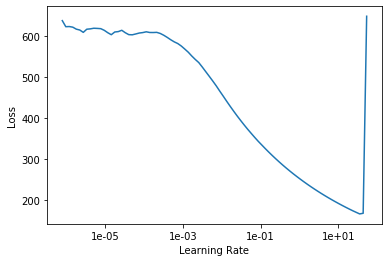

In [77]:
learn.recorder.plot(skip_end=1)

In [78]:
learn.fit_one_cycle(cyc_len=10, max_lr=5e-2)

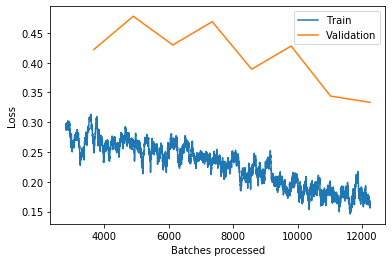

In [86]:
learn.recorder.plot_losses(skip_start=2800)

In [87]:
learn.save('effnetb0_pairselect_margin_1_10epch')

## Visualize embedding

In [88]:
def hv_dist_pc(pc):
    vdims = ['Density',]
    disf = hv.Distribution(embdf_val[embdf_val.label=='FAKE'][pc], vdims=vdims)
    disf = disf.opts(hv.opts.Distribution(alpha=.1, color='blue'))
    disf = disf.relabel('FAKE')

    disr = hv.Distribution(embdf_val[embdf_val.label=='REAL'][pc], vdims=vdims)
    disr = disr.opts(hv.opts.Distribution(alpha=.2, color='red'))
    disr = disr.relabel('REAL')
    return (disf * disr).relabel(f'Principal component {pc} density').opts(width=500)

In [89]:
def hv_scatter_pcs(embdf, pcx, pcy):
    kdims = ('x', f'Principal component {pcx}')
    vdims = ('y', f'Principal component {pcy}')

    pts_fake = embdf[embdf.label=='FAKE'][[pcx, pcy]].values
    pts_fake = hv.Scatter(pts_fake, kdims=kdims, vdims=vdims)
    pts_fake = pts_fake.opts(hv.opts.Scatter(size=10, alpha=.2, color='blue'))
    pts_fake = pts_fake.relabel('FAKE')

    pts_real = embdf[embdf.label=='REAL'][[pcx, pcy]].values
    pts_real = hv.Scatter(pts_real, kdims=kdims, vdims=vdims)
    pts_real = pts_real.opts(hv.opts.Scatter(size=5, alpha=.2, color='red'))
    pts_real = pts_real.relabel('REAL')
    return (pts_fake * pts_real).opts(width=500, height=300, legend_position='bottom_right')

In [90]:
emb_trn, labels_trn = extract_embeddings(learn.data.train_dl, learn.model)

In [91]:
embb_trn = emb_trn.pca(20).numpy()

In [92]:
embdf_trn = pd.DataFrame(embb_trn)
embdf_trn['label'] = [learn.data.classes[int(i)] for i in labels_trn.numpy()]

In [99]:
hv_scatter_pcs(embdf_trn, 5, 6)

:Overlay
   .Scatter.FAKE :Scatter   [x]   (y)
   .Scatter.REAL :Scatter   [x]   (y)

In [100]:
emb_val, labels_val = extract_embeddings(learn.data.valid_dl, learn.model)


In [101]:
embb_val = emb_val.pca(20).numpy()

In [102]:
embdf_val = pd.DataFrame(embb_val)
embdf_val['label'] = [learn.data.classes[int(i)] for i in labels_val.numpy()]

In [103]:
hv_scatter_pcs(embdf_val, 1, 7)

:Overlay
   .Scatter.FAKE :Scatter   [x]   (y)
   .Scatter.REAL :Scatter   [x]   (y)

In [104]:
hv_scatter_pcs(embdf_val, 3, 2)

:Overlay
   .Scatter.FAKE :Scatter   [x]   (y)
   .Scatter.REAL :Scatter   [x]   (y)

In [105]:
hv_dist_pc(1)

:Overlay
   .Distribution.FAKE :Distribution   [Value]   (Density)
   .Distribution.REAL :Distribution   [Value]   (Density)

# - fin